# Conhecendo a base de dados

## Importando os dados


In [2]:
import pandas as pd

In [3]:
url = '../files/aluguel.csv'
#pd.read_csv(url)
#ler csv e armazenar em um df
dados = pd.read_csv(url, sep=';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [4]:
#primeiras 10 linhas
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [5]:
#ultimas linhas
dados.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [6]:
#verificando que é uma variavel do type dataframe
type(dados)

pandas.core.frame.DataFrame

## Características gerais da base de dados

In [7]:
#quantidade de linhas e colunas
dados.shape

(32960, 9)

In [8]:
#verificando quais colunas existem
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [9]:
#verificando qual tipagem dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [10]:
#trazendo apenas uma coluna do dataframe
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [11]:
#trazedo duas colunas 
dados[['Quartos', 'Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [12]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [13]:
#media do campo valor
dados['Valor'].mean()

np.float64(12952.659715265761)

In [14]:
#agrupando por tipo e sumando apenas valores numericos
dados.groupby('Tipo').mean(numeric_only=True)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


In [15]:
#agrupand por tipo e somando apenas valor
dados.groupby('Tipo')['Valor'].mean()

Tipo
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

In [16]:
#agrupando tipo, somando valores e ordenando do maior para menor
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor',ascending=0)

,Valor
Tipo,
Prédio Inteiro,498637.239203
Indústria,120000.000000
Galpão/Depósito/Armazém,53407.062600
Terreno Padrão,32567.714286
Hotel,25000.000000
Loteamento/Condomínio,22000.000000
Conjunto Comercial/Sala,14715.045521
Casa Comercial,14478.264151
Loja/Salão,13769.646770


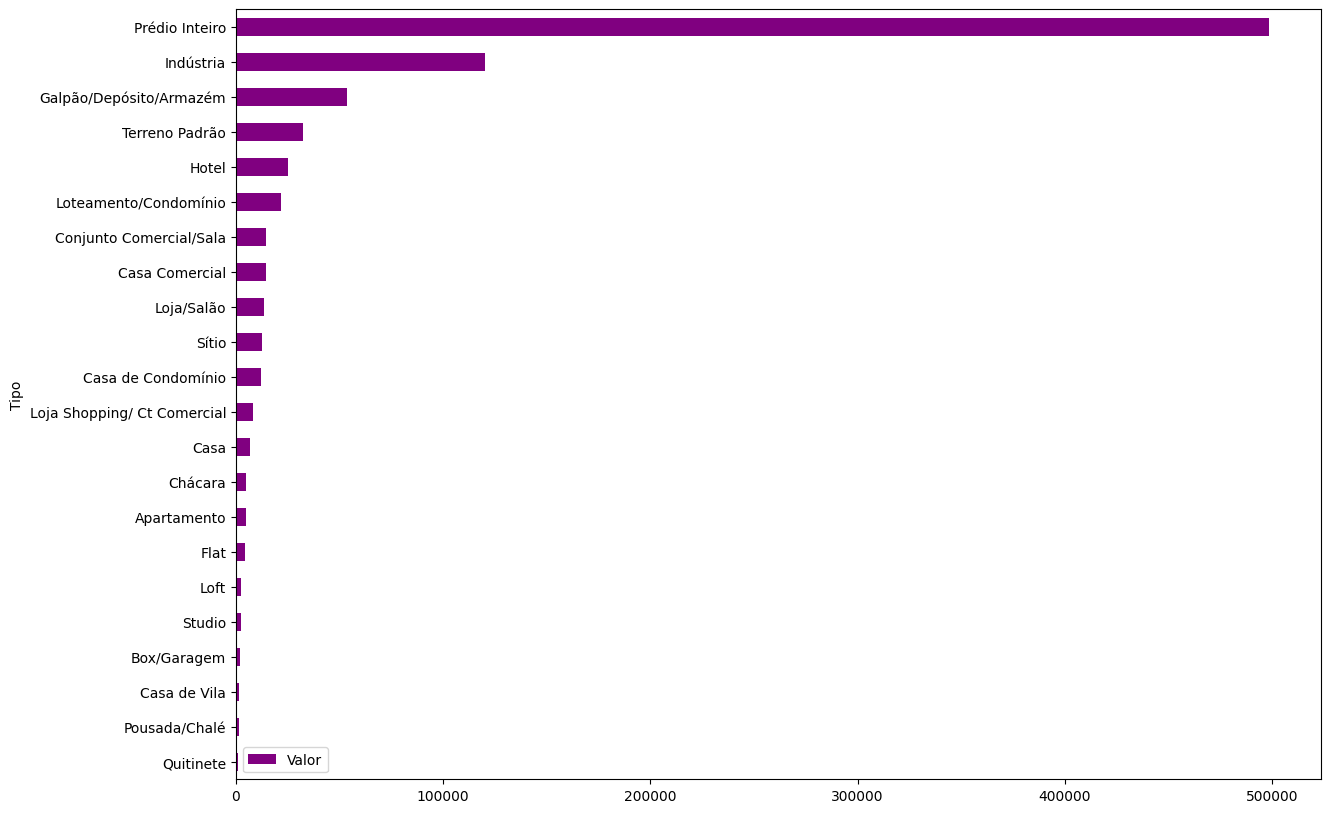

In [17]:
#guardando informações em outra df
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

#plotando grafico de barras
df_preco_tipo.plot(kind='barh', figsize=(14, 10), color ='purple');

## Removendo os imóveis comerciais

In [18]:
#verificamos os tipos de imoveis 
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [19]:
#criando uma lista com os tipos comerciais que não serão usados
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']


In [20]:
#validando query
dados.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [21]:
#validando query
dados.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [22]:
#criando df com imoveis que serão usados para nnalise
df = dados.query('@imoveis_comerciais not in Tipo')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [23]:
#verificando os tipos de imoveis que ficaram
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

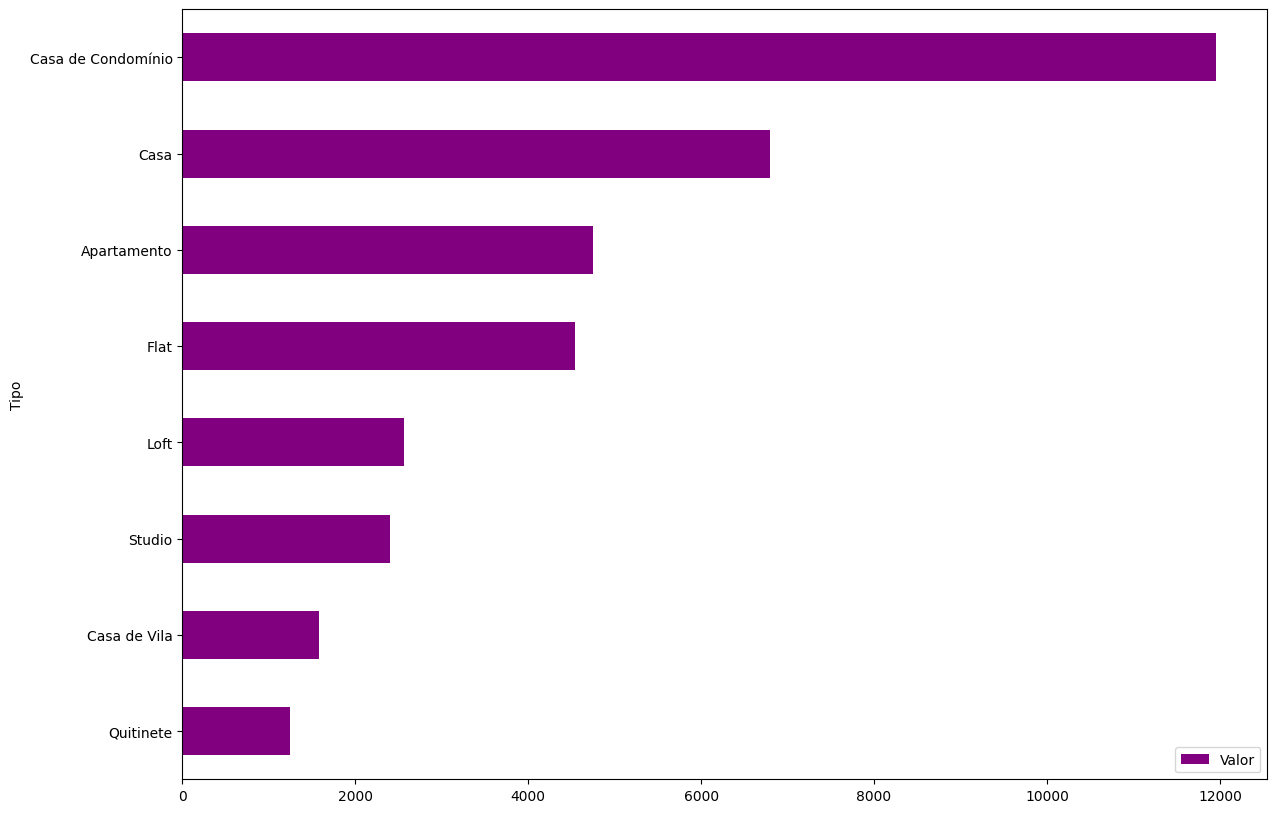

In [24]:
#agrupando tipo dos imoveis residenciais por valor
df_preco_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

#protando grafico
df_preco_tipo.plot(kind='barh', figsize=(14, 10), color ='purple');

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [25]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [26]:
#verificando discrepancia dos valores distribuidos
df.Tipo.value_counts(normalize=True)

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64

In [27]:
#transformando em data frame
df.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

,proportion
Tipo,
Apartamento,0.845139
Casa,0.041842
Casa de Condomínio,0.043096
Casa de Vila,0.010774
Flat,0.020596
Loft,0.002207
Quitinete,0.036173
Studio,0.000173


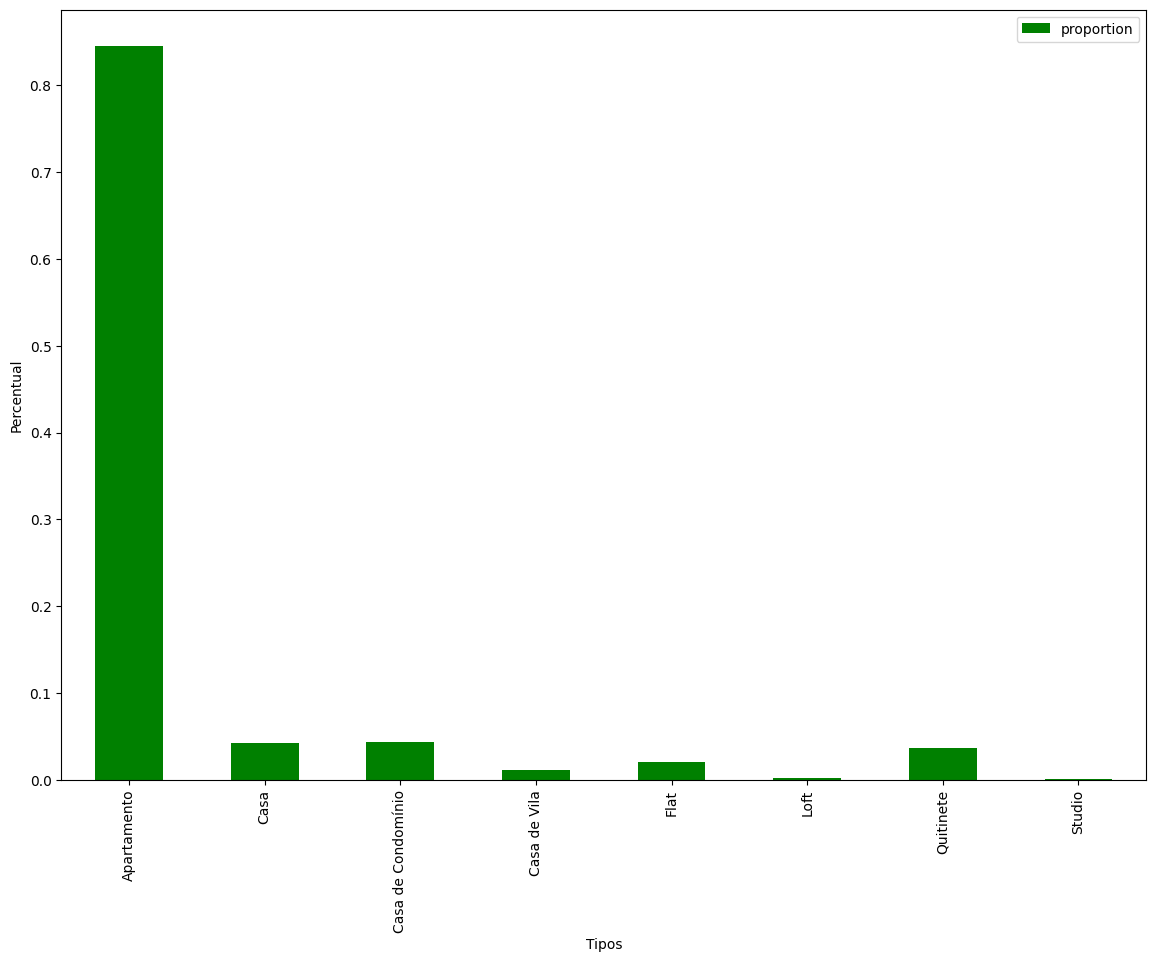

In [28]:
#guardando distribuição dos imoveis por tipo em uma nova df
df_percentual_tipo = df.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

#platando grafico
df_percentual_tipo.plot(kind='bar', figsize=(14, 10), color ='green',
                        xlabel = 'Tipos', ylabel = 'Percentual');

### **Selecionando apenas os imóveis do tipo apartamento**

In [29]:
#selecionando apenas apartamentos
df.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [30]:
#criando df
df = df.query('Tipo == "Apartamento"')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


# Tratando e filtrando os dados

## Lidando com dados nulos

In [31]:
#validação de todas  colunas 
df.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32951,False,False,False,False,False,False,False,False,True
32953,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [32]:
#somando nulos por tipo
df.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [33]:
#transformndo nulo em 0
df.fillna(0)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [34]:
#atribuindo a df
df = df.fillna(0)

In [ ]:
#validando tratamento de nulos
df.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

## Removendo registros

In [ ]:
#removendo valores zerados
df.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [ ]:
#criando uma serie para pegar os registros que serão excluidos
df.query('Valor == 0 | Condominio == 0').index

Index([    5,    10,    76,   113,   166,   194,   258,   265,   275,   292,
       ...
       32420, 32438, 32480, 32538, 32584, 32609, 32643, 32666, 32708, 32809],
      dtype='int64', length=752)

In [ ]:
#atribuidos a df
registros_a_remover = df.query('Valor == 0 | Condominio == 0').index

In [ ]:
#deletando direto na df
df.drop(registros_a_remover, axis=0, inplace=True)

In [ ]:
#validando
df.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [41]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [ ]:
#tipo ficou  com um unico valor
df.Tipo.unique()

array(['Apartamento'], dtype=object)

In [ ]:
#exclui coluna
df.drop('Tipo', axis=1, inplace=True)

In [44]:
df.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [45]:
df['Quartos'] == 1

3         True
4         True
6        False
11       False
12       False
         ...  
32951    False
32953    False
32956    False
32957    False
32958    False
Name: Quartos, Length: 18780, dtype: bool

In [46]:
selecao1 = df['Quartos'] == 1
df[selecao1]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
...,...,...,...,...,...,...,...,...
32918,Ipanema,1,0,0,55,2000.0,630.0,19.0
32922,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [47]:
selecao2 = df['Valor'] < 1200
df[selecao2]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
19,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Olaria,3,1,0,68,1000.0,670.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...
32925,Campinho,2,0,0,63,800.0,392.0,0.0
32930,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0


In [48]:
selecao_final = (selecao1) & (selecao2)
df[selecao_final]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [49]:
df_1 = df[selecao_final]

### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [50]:
selecao = (df['Quartos'] >= 2) & (df['Valor'] < 3000) & (df['Area'] > 70)
df[selecao]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


In [51]:
df_2 = df[selecao]

## Salvando os dados

In [66]:
df.to_csv('../files/dados_apartamentos.csv')

In [ ]:
#salvou com coluna index
pd.read_csv('../files/dados_apartamentos.csv')

In [70]:
#salvou sem coluna index
df.to_csv('../files/dados_apartamentos.csv', index=False)

In [ ]:
pd.read_csv('../files/dados_apartamentos.csv')

In [73]:
df.to_csv('../files/dados_apartamentos.csv', index=False, sep=';')

In [ ]:
pd.read_csv('../files/dados_apartamentos.csv')

In [ ]:
pd.read_csv('../files/dados_apartamentos.csv', sep=';')

# Manipulando os dados

## Criando colunas numéricas

In [86]:
##url = '../files/aluguel.csv'
##dados = pd.read_csv(url, sep=';')
##dados.head()
dados.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [87]:
dados['Valor_por_mes'] = dados['Valor'] + dados['Condominio']
dados.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
3,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0


In [88]:
dados['Valor_por_ano'] = dados['Valor_por_mes'] * 12 + dados['IPTU']
dados.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
3,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0,25778.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0,23474.0


## Criando colunas categóricas

In [90]:
dados['Descricao'] = 'Ap em ' + dados['Bairro']
dados.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
3,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Ap em Centro
4,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,Ap em Higienópolis
6,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0,Ap em Cachambi
11,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0,25778.0,Ap em Grajaú
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0,23474.0,Ap em Lins de Vasconcelos


In [91]:
dados['Descricao'] = 'AP em ' + dados['Bairro'] + ' com '  + \
                     dados['Quartos'].astype(str) + ' quarto(s) '  + \
                     ' e '  + dados['Vagas'].astype(str) + ' vaga(s) de garagem.'
dados.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
3,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,AP em Centro com 1 quarto(s) e 0 vaga(s) de g...
4,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,AP em Higienópolis com 1 quarto(s) e 0 vaga(s...
6,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0,AP em Cachambi com 2 quarto(s) e 0 vaga(s) de...
11,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0,25778.0,AP em Grajaú com 2 quarto(s) e 1 vaga(s) de g...
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0,23474.0,AP em Lins de Vasconcelos com 3 quarto(s) e 1...


In [92]:
dados['Possui_suite'] = dados['Suites'].apply(lambda x: "Sim" if x > 0 else "Não")
dados.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
3,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,AP em Centro com 1 quarto(s) e 0 vaga(s) de g...,Não
4,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,AP em Higienópolis com 1 quarto(s) e 0 vaga(s...,Não
6,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0,AP em Cachambi com 2 quarto(s) e 0 vaga(s) de...,Não
11,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0,25778.0,AP em Grajaú com 2 quarto(s) e 1 vaga(s) de g...,Não
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0,23474.0,AP em Lins de Vasconcelos com 3 quarto(s) e 1...,Sim


In [ ]:
dados.to_csv('../files/dados_completos_dev.csv', index=False, sep=';')


# Manipulando dados com CSV, EXCEL, HTML, XML E SQLITE

## **Aula 1 - Fazendo leitura de arquivos CSV**

Dados:
- https://github.com/alura-cursos/Pandas/blob/main/superstore_data.csv
- https://github.com/alura-cursos/Pandas/blob/main/superstore_data_ponto_virgula.csv

### **Lendo arquivos CSV**

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/Pandas/main/superstore_data.csv'

In [ ]:
dados = pd.read_csv(url)

In [ ]:
dados.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
url_2 = 'https://raw.githubusercontent.com/alura-cursos/Pandas/main/superstore_data_ponto_virgula.csv'

In [ ]:
dados_ponto_virgula = pd.read_csv(url_2)

In [ ]:
dados_ponto_virgula.head()

,Id;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeatProducts;MntFishProducts;MntSweetProducts;MntGoldProds;NumDealsPurchases;NumWebPurchases;NumCatalogPurchases;NumStorePurchases;NumWebVisitsMonth;Response;Complain
0,1826;1970;Graduation;Divorced;84835;0;0;6/16/2...
1,1;1961;Graduation;Single;57091;0;0;6/15/2014;0...
2,10476;1958;Graduation;Married;67267;0;1;5/13/2...
3,1386;1967;Graduation;Together;32474;1;1;11/5/2...
4,5371;1989;Graduation;Single;21474;1;0;8/4/2014...


### **Parâmetros da função read_csv**
Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [ ]:
dados_ponto_virgula = pd.read_csv(url_2, sep = ';')

In [ ]:
dados_ponto_virgula

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [ ]:
dados_primeiras_linhas = pd.read_csv(url,nrows=5)
dados_primeiras_linhas

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
dados_selecao = pd.read_csv(url, usecols=['Id', 'Year_Birth', 'Income'])
dados_selecao

,Id,Year_Birth,Income
0,1826,1970,84835.0
1,1,1961,57091.0
2,10476,1958,67267.0
3,1386,1967,32474.0
4,5371,1989,21474.0
...,...,...,...
2235,10142,1976,66476.0
2236,5263,1977,31056.0
2237,22,1976,46310.0
2238,528,1978,65819.0


In [ ]:
dados_selecao = pd.read_csv(url, usecols=[0,1,4])
dados_selecao

,Id,Year_Birth,Income
0,1826,1970,84835.0
1,1,1961,57091.0
2,10476,1958,67267.0
3,1386,1967,32474.0
4,5371,1989,21474.0
...,...,...,...
2235,10142,1976,66476.0
2236,5263,1977,31056.0
2237,22,1976,46310.0
2238,528,1978,65819.0


### **Escrevendo arquivos CSV**

Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [ ]:
dados_selecao.to_csv('clientes_mercado.csv')

In [ ]:
clientes_mercado = pd.read_csv('/content/clientes_mercado.csv')
clientes_mercado

,Unnamed: 0,Id,Year_Birth,Income
0,0,1826,1970,84835.0
1,1,1,1961,57091.0
2,2,10476,1958,67267.0
3,3,1386,1967,32474.0
4,4,5371,1989,21474.0
...,...,...,...,...
2235,2235,10142,1976,66476.0
2236,2236,5263,1977,31056.0
2237,2237,22,1976,46310.0
2238,2238,528,1978,65819.0


In [ ]:
dados_selecao.to_csv('dados_mercado.csv', index=False)

In [ ]:
dados_mercado = pd.read_csv('/content/dados_mercado.csv')
dados_mercado

,Id,Year_Birth,Income
0,1826,1970,84835.0
1,1,1961,57091.0
2,10476,1958,67267.0
3,1386,1967,32474.0
4,5371,1989,21474.0
...,...,...,...
2235,10142,1976,66476.0
2236,5263,1977,31056.0
2237,22,1976,46310.0
2238,528,1978,65819.0


## **Aula 2 - Utilizando planilhas**

Dados: https://github.com/alura-cursos/Pandas/blob/main/emissoes_CO2.xlsx

### **Lendo arquivos Excel**

In [ ]:
import pandas as pd

In [ ]:
url = 'https://github.com/alura-cursos/Pandas/blob/main/emissoes_CO2.xlsx?raw=True'

In [ ]:
dados_co2 = pd.read_excel(url)

In [ ]:
dados_co2.head()

,País,ISO 3166-1 alpha-3,Ano,Total,Carvão,Oléo,Gás,Cimento,Queima,Outro,Per Capita
0,Afeganistão,AFG,1750.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afeganistão,AFG,1751.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afeganistão,AFG,1752.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afeganistão,AFG,1753.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afeganistão,AFG,1754.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.ExcelFile(url).sheet_names

['emissoes_C02', 'emissoes_percapita', 'fontes']

### **Parâmetros da função read_excel**

Documentação: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

In [ ]:
percapita = pd.read_excel(url, sheet_name='emissoes_percapita')

In [ ]:
percapita.head()

,País,ISO 3166-1 alpha-3,Ano,Total,Carvão,Óleo,Gás,Cimento,Queima,Outro
0,Afeganistão,AFG,1750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afeganistão,AFG,1751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afeganistão,AFG,1752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afeganistão,AFG,1753.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afeganistão,AFG,1754.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fontes = pd.read_excel(url, sheet_name='fontes')

In [ ]:
fontes.head()

,País,ISO 3166-1 alpha-3,Ano,Total,Carvão,Oléo,Gás,Cimento,Queima,Outro,Per Capita
0,Afeganistão,AFG,1750.0,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
1,Afeganistão,AFG,1751.0,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
2,Afeganistão,AFG,1752.0,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
3,Afeganistão,AFG,1753.0,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
4,Afeganistão,AFG,1754.0,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]


In [ ]:
intervalo = pd.read_excel(url, sheet_name='emissoes_C02', usecols= 'A:D')

In [ ]:
intervalo

,País,ISO 3166-1 alpha-3,Ano,Total
0,Afeganistão,AFG,1750.0,0.000000e+00
1,Afeganistão,AFG,1751.0,0.000000e+00
2,Afeganistão,AFG,1752.0,0.000000e+00
3,Afeganistão,AFG,1753.0,0.000000e+00
4,Afeganistão,AFG,1754.0,0.000000e+00
...,...,...,...,...
63099,Global,WLD,2017.0,3.609674e+10
63100,Global,WLD,2018.0,3.682651e+10
63101,Global,WLD,2019.0,3.708256e+10
63102,Global,WLD,2020.0,3.526409e+10


In [ ]:
intervalo_2 = pd.read_excel(url, sheet_name='emissoes_C02', usecols= 'A:D', nrows=10)

In [ ]:
intervalo_2

,País,ISO 3166-1 alpha-3,Ano,Total
0,Afeganistão,AFG,1750.0,0.0
1,Afeganistão,AFG,1751.0,0.0
2,Afeganistão,AFG,1752.0,0.0
3,Afeganistão,AFG,1753.0,0.0
4,Afeganistão,AFG,1754.0,0.0
5,Afeganistão,AFG,1755.0,0.0
6,Afeganistão,AFG,1756.0,0.0
7,Afeganistão,AFG,1757.0,0.0
8,Afeganistão,AFG,1758.0,0.0
9,Afeganistão,AFG,1759.0,0.0


### **Escrevendo arquivos Excel**

In [ ]:
percapita.to_excel('co2_percapita.xlsx', index=False)

In [ ]:
pd.read_excel('/content/co2_percapita.xlsx')

,País,ISO 3166-1 alpha-3,Ano,Total,Carvão,Óleo,Gás,Cimento,Queima,Outro
0,Afeganistão,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afeganistão,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afeganistão,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afeganistão,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afeganistão,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,4749682.0,1908857.0,1610910.0,940144.0,198416.0,51579.0,39776.0
63100,Global,WLD,2018,4792753.0,1919213.0,1596350.0,979965.0,204225.0,53634.0,39366.0
63101,Global,WLD,2019,4775633.0,1896468.0,1589920.0,984878.0,208309.0,56569.0,39490.0
63102,Global,WLD,2020,4497423.0,1807760.0,1427353.0,963695.0,208844.0,51981.0,37789.0


### **Lendo dados do Google Planilhas**

link da planilha: https://docs.google.com/spreadsheets/d/1lzq0k-41-MbbS63C3Q9i1wPvLkSJt9zhr4Jolt1vEog/edit?usp=sharing

In [ ]:
sheet_id = '1lzq0k-41-MbbS63C3Q9i1wPvLkSJt9zhr4Jolt1vEog'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet'

In [ ]:
dados_co2_sheets = pd.read_csv(url)

In [ ]:
dados_co2_sheets

,País,ISO 3166-1 alpha-3,Ano,Total,Carvão,Oléo,Gás,Cimento,Queima,Outro,Per Capita
0,Afeganistão,AFG,1750,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afeganistão,AFG,1751,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afeganistão,AFG,1752,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afeganistão,AFG,1753,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afeganistão,AFG,1754,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36.096.739.276,14.506.973.805,12.242.627.935,7.144.928.128,1.507.923.185,391.992.176,302.294.047,4.749.682
63100,Global,WLD,2018,36.826.506.600,14.746.830.688,12.266.016.285,7.529.846.784,1.569.218.392,412.115.746,302.478.706,4.792.753
63101,Global,WLD,2019,37.082.558.969,14.725.978.025,12.345.653.374,7.647.528.220,1.617.506.786,439.253.991,306.638.573,4.775.633
63102,Global,WLD,2020,35.264.085.734,14.174.564.010,11.191.808.551,7.556.290.283,1.637.537.532,407.583.673,296.301.685,4.497.423


In [ ]:
sheet_id = '1lzq0k-41-MbbS63C3Q9i1wPvLkSJt9zhr4Jolt1vEog'
sheet_name = 'emissoes_percapita'
url_percapita = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [ ]:
percapita_sheets = pd.read_csv(url_percapita)

In [ ]:
percapita_sheets.head()

,País,ISO 3166-1 alpha-3,Ano,Total,Carvão,Óleo,Gás,Cimento,Queima,Outro
0,Afeganistão,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afeganistão,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afeganistão,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afeganistão,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afeganistão,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sheet_id = '1lzq0k-41-MbbS63C3Q9i1wPvLkSJt9zhr4Jolt1vEog'
sheet_name = 'fontes'
url_fontes = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [ ]:
fontes_sheets = pd.read_csv(url_fontes)

In [ ]:
fontes_sheets.head()

,País,ISO 3166-1 alpha-3,Ano,Total,Carvão,Oléo,Gás,Cimento,Queima,Outro,Per Capita
0,Afeganistão,AFG,1750,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
1,Afeganistão,AFG,1751,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
2,Afeganistão,AFG,1752,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
3,Afeganistão,AFG,1753,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
4,Afeganistão,AFG,1754,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]


## **Aula 3 - Manipulando arquivos JSON**

Dados:
- https://github.com/alura-cursos/Pandas/blob/main/pacientes.json
- https://github.com/alura-cursos/Pandas/blob/main/pacientes_2.json

### **Lendo arquivos JSON**

In [ ]:
import pandas as pd

In [ ]:
dados_pacientes = pd.read_json('/content/pacientes.json')

In [ ]:
dados_pacientes

,ID_paciente,Doenca_cardiaca,IMC,Fumante,Consumo_alcool,AVC,Saude_fisica,Saude_mental,Dificuldade_caminhar,Sexo_biologico,Faixa_etaria,Raca,Diabetes,Atividade_fisica,Saude_geral,Horas_sono,Asma,Doenca_renal,Cancer_pele
0,0,Nao,16.60,Sim,Nao,Nao,3,30,Nao,Feminino,55-59,Branca,Sim,Sim,Muito boa,5,Sim,Nao,Sim
1,1,Nao,20.34,Nao,Nao,Sim,0,0,Nao,Feminino,80 ou +,Branca,Nao,Sim,Muito boa,7,Nao,Nao,Nao
2,2,Nao,26.58,Sim,Nao,Nao,20,30,Nao,Masculino,65-69,Branca,Sim,Sim,Razoavel,8,Sim,Nao,Nao
3,3,Nao,24.21,Nao,Nao,Nao,0,0,Nao,Feminino,75-79,Branca,Nao,No,Boa,6,Nao,Nao,Sim
4,4,Nao,23.71,Nao,Nao,Nao,28,0,Sim,Feminino,40-44,Branca,Nao,Sim,Muito boa,8,Nao,Nao,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Nao,28.29,Sim,Nao,Nao,10,20,Nao,Feminino,65-69,Preta,Sim,Sim,Razoavel,8,Nao,Nao,Nao
996,996,Nao,25.69,Sim,Nao,Nao,0,0,Nao,Feminino,75-79,Branca,Nao,Sim,Excelente,8,Nao,Nao,Nao
997,997,Sim,26.99,Nao,Nao,Nao,1,0,Nao,Masculino,70-74,Branca,Nao,Sim,Muito boa,8,Nao,Nao,Nao
998,998,Nao,44.29,Nao,Nao,Nao,30,0,Sim,Feminino,70-74,Branca,Sim,No,Boa,6,Sim,Nao,Nao


In [ ]:
dados_pacientes_2 = pd.read_json('/content/pacientes_2.json')

In [ ]:
dados_pacientes_2

,Pesquisa,Ano,Pacientes
0,Principais Indicadores de Doenca Cardiaca,2020,"{'ID': '01', 'Faixa_etaria': '55-59', 'Sexo_bi..."
1,Principais Indicadores de Doenca Cardiaca,2020,"{'ID': '02', 'Faixa_etaria': '80 ou +', 'Sexo_..."
2,Principais Indicadores de Doenca Cardiaca,2020,"{'ID': '03', 'Faixa_etaria': '65-69', 'Sexo_bi..."


### **Normalizando arquivos JSON**

In [ ]:
df_normalizado = pd.json_normalize(dados_pacientes_2['Pacientes'])

In [ ]:
df_normalizado

,ID,Faixa_etaria,Sexo_biologico,Raça,IMC,Fumante,Consumo_alcool,Saude_fisica,Saude_mental,Dificuldade_caminhar,Atividade_fisica,Saude_geral,Horas_sono,Problemas_saude
0,01,55-59,Feminino,Branca,16.60,Sim,Nao,3,30,Nao,Sim,Muito boa,5,"[Diabetes, Asma, Cancer_pele]"
1,02,80 ou +,Feminino,Branca,20.34,Nao,Nao,0,0,Nao,Sim,Muito boa,7,[AVC]
2,03,65-69,Masculino,Branca,26.58,Sim,Nao,20,30,Nao,Sim,Muito boa,8,"[diabetes, Asma]"


### **Escrevendo arquivos JSON**

In [ ]:
df_normalizado.to_json('historico_pacientes_norm.json')

In [ ]:
pd.read_json('/content/historico_pacientes_norm.json')

,ID,Faixa_etaria,Sexo_biologico,Raça,IMC,Fumante,Consumo_alcool,Saude_fisica,Saude_mental,Dificuldade_caminhar,Atividade_fisica,Saude_geral,Horas_sono,Problemas_saude
0,1,55-59,Feminino,Branca,16.60,Sim,Nao,3,30,Nao,Sim,Muito boa,5,"[Diabetes, Asma, Cancer_pele]"
1,2,80 ou +,Feminino,Branca,20.34,Nao,Nao,0,0,Nao,Sim,Muito boa,7,[AVC]
2,3,65-69,Masculino,Branca,26.58,Sim,Nao,20,30,Nao,Sim,Muito boa,8,"[diabetes, Asma]"


## **Aula 4 - Lendo dados em HTML e XML**

Dados: https://github.com/alura-cursos/Pandas/blob/main/filmes_wikipedia.html

### **Lendo páginas web**

In [ ]:
import pandas as pd

In [ ]:
dados_html = pd.read_html('/content/filmes_wikipedia.html')

In [ ]:
dados_html

[                                                    0  \
 0                                                1998   
 1                                                1999   
 2                                                2000   
 3                                                2001   
 4                                                2002   
 5                                                2003   
 6                                                2004   
 7                                                2005   
 8                                                2005   
 9                                                2006   
 10                                               2006   
 11                                               2007   
 12                                               2008   
 13  .mw-parser-output .hlist dl,.mw-parser-output ...   
 
                                                     1  
 0                                          100 Movies  
 1            

In [ ]:
type(dados_html)

list

In [ ]:
len(dados_html)

3

In [ ]:
top_filmes = dados_html[1]

In [ ]:
top_filmes

,Film,Release year,Director,Production companies,Rank
0,Citizen Kane,1941,Orson Welles,RKO Radio Pictures,1
1,Casablanca,1942,Michael Curtiz,Warner Bros. Pictures,2
2,The Godfather,1972,Francis Ford Coppola,"Paramount Pictures, Alfran Productions",3
3,Gone with the Wind,1939,Victor Fleming,Selznick International Pictures,4
4,Lawrence of Arabia,1962,David Lean,Horizon Pictures,5
...,...,...,...,...,...
95,The Searchers,1956,John Ford,C. V. Whitney Pictures,96
96,Bringing Up Baby,1938,Howard Hawks,RKO Radio Pictures,97
97,Unforgiven,1992,Clint Eastwood,The Malpaso Company,98
98,Guess Who's Coming to Dinner,1967,Stanley Kramer,Columbia Pictures,99


### **Escrevendo arquivos HTML**

In [ ]:
top_filmes.to_html('top_filmes.html')

In [ ]:
pd.read_html('/content/top_filmes.html')

[    Unnamed: 0                          Film  Release year  \
 0            0                  Citizen Kane          1941   
 1            1                    Casablanca          1942   
 2            2                 The Godfather          1972   
 3            3            Gone with the Wind          1939   
 4            4            Lawrence of Arabia          1962   
 ..         ...                           ...           ...   
 95          95                 The Searchers          1956   
 96          96              Bringing Up Baby          1938   
 97          97                    Unforgiven          1992   
 98          98  Guess Who's Coming to Dinner          1967   
 99          99           Yankee Doodle Dandy          1942   
 
                 Director                    Production companies  Rank  
 0           Orson Welles                      RKO Radio Pictures     1  
 1         Michael Curtiz                   Warner Bros. Pictures     2  
 2   Francis Ford Co

In [ ]:
top_filmes.to_csv('top_filmes_1998', index=False)

In [ ]:
dados = pd.read_csv('/content/top_filmes_1998')
dados.head()

,Film,Release year,Director,Production companies,Rank
0,Citizen Kane,1941,Orson Welles,RKO Radio Pictures,1
1,Casablanca,1942,Michael Curtiz,Warner Bros. Pictures,2
2,The Godfather,1972,Francis Ford Coppola,"Paramount Pictures, Alfran Productions",3
3,Gone with the Wind,1939,Victor Fleming,Selznick International Pictures,4
4,Lawrence of Arabia,1962,David Lean,Horizon Pictures,5


### **Lendo/escrevendo arquivos XML**
Dados: https://github.com/alura-cursos/Pandas/blob/main/imdb_top_1000.xml


In [ ]:
import pandas as pd

In [ ]:
dados_imdb = pd.read_xml('/content/imdb_top_1000.xml')

In [ ]:
dados_imdb.head(3)

,index,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [ ]:
dados_imdb.to_xml('filmes_imdb.xml')

## **Aula 5 - Trabalhando com banco de dados**

Dados: https://github.com/vqrca/Pandas/blob/main/clientes_banco.csv

### **Criando um banco de dados local**

In [ ]:
import sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [ ]:
engine = create_engine('sqlite:///:memory:')

### **Escrevendo em um banco de dados**

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/Pandas/main/clientes_banco.csv'

In [ ]:
dados = pd.read_csv(url)

In [ ]:
dados.head()

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia
0,5008804,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado
1,5008805,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado
2,5008806,58,Ensino médio,Casado,2,Empregado,Segurança,3,112500.0,1,Casa/apartamento próprio
3,5008808,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
4,5008809,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio


In [ ]:
dados.to_sql('clientes', engine, index=False)

438463

In [ ]:
inspector = inspect(engine)

In [ ]:
print(inspector.get_table_names())

['clientes']


### **Lendo uma consulta SQL**

In [ ]:
query = 'SELECT * FROM clientes WHERE Categoria_de_renda = "Empregado"'

In [ ]:
empregados = pd.read_sql(query, engine)

In [ ]:
empregados

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia
0,5008804,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado
1,5008805,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado
2,5008806,58,Ensino médio,Casado,2,Empregado,Segurança,3,112500.0,1,Casa/apartamento próprio
3,5008815,46,Ensino superior,Casado,2,Empregado,Contabilidade,2,270000.0,1,Casa/apartamento próprio
4,5112956,46,Ensino superior,Casado,2,Empregado,Contabilidade,2,270000.0,1,Casa/apartamento próprio
...,...,...,...,...,...,...,...,...,...,...,...
226054,6837905,43,Ensino médio,Casado,3,Empregado,Outro,7,355050.0,1,Casa/apartamento próprio
226055,6837906,43,Ensino médio,Casado,3,Empregado,Outro,7,355050.0,1,Casa/apartamento próprio
226056,6839936,34,Ensino médio,Casado,3,Empregado,Construção Civil,5,135000.0,1,Casa/apartamento próprio
226057,6840222,43,Ensino médio,Solteiro,1,Empregado,Construção Civil,8,103500.0,0,Casa/apartamento próprio


In [ ]:
empregados.to_sql('empregados', con=engine, index=False)

226059

In [ ]:
pd.read_sql_table('empregados', engine)

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia
0,5008804,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado
1,5008805,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado
2,5008806,58,Ensino médio,Casado,2,Empregado,Segurança,3,112500.0,1,Casa/apartamento próprio
3,5008815,46,Ensino superior,Casado,2,Empregado,Contabilidade,2,270000.0,1,Casa/apartamento próprio
4,5112956,46,Ensino superior,Casado,2,Empregado,Contabilidade,2,270000.0,1,Casa/apartamento próprio
...,...,...,...,...,...,...,...,...,...,...,...
226054,6837905,43,Ensino médio,Casado,3,Empregado,Outro,7,355050.0,1,Casa/apartamento próprio
226055,6837906,43,Ensino médio,Casado,3,Empregado,Outro,7,355050.0,1,Casa/apartamento próprio
226056,6839936,34,Ensino médio,Casado,3,Empregado,Construção Civil,5,135000.0,1,Casa/apartamento próprio
226057,6840222,43,Ensino médio,Solteiro,1,Empregado,Construção Civil,8,103500.0,0,Casa/apartamento próprio


In [ ]:
pd.read_sql_table('empregados', engine, columns=['ID_Cliente', 'Grau_escolaridade',
                                                 'Rendimento_anual'])

,ID_Cliente,Grau_escolaridade,Rendimento_anual
0,5008804,Ensino superior,427500.0
1,5008805,Ensino superior,427500.0
2,5008806,Ensino médio,112500.0
3,5008815,Ensino superior,270000.0
4,5112956,Ensino superior,270000.0
...,...,...,...
226054,6837905,Ensino médio,355050.0
226055,6837906,Ensino médio,355050.0
226056,6839936,Ensino médio,135000.0
226057,6840222,Ensino médio,103500.0


### **Atualizando um banco de dados**

In [ ]:
query = 'SELECT * FROM clientes'

In [ ]:
pd.read_sql(query, engine)

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia
0,5008804,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado
1,5008805,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado
2,5008806,58,Ensino médio,Casado,2,Empregado,Segurança,3,112500.0,1,Casa/apartamento próprio
3,5008808,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
4,5008809,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
...,...,...,...,...,...,...,...,...,...,...,...
438458,6840104,62,Ensino médio,Divorciado,1,Pensionista,Outro,0,135000.0,0,Casa/apartamento próprio
438459,6840222,43,Ensino médio,Solteiro,1,Empregado,Construção Civil,8,103500.0,0,Casa/apartamento próprio
438460,6841878,22,Ensino superior,Solteiro,1,Associado comercial,Vendas,1,54000.0,0,Mora com os pais
438461,6842765,59,Ensino médio,Casado,2,Pensionista,Outro,0,72000.0,0,Casa/apartamento próprio


Para atualizar os dados da tabela, precisamos fazer a seguinte importação:

In [ ]:
from sqlalchemy import text

Depois disso, para fazer as atualizações, vamos implementar o seguinte código:




In [ ]:
query = 'DELETE FROM clientes WHERE ID_Cliente=5008804'
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()

> O código estabelece uma conexão com um banco de dados usando SQLAlchemy e executa uma consulta SQL definida na variável query. Dentro do bloco `with`, que garante o fechamento automático da conexão após a execução do bloco, a consulta é enviada ao banco de dados através do método `conn.execute(text(query))`, onde `text` é usado para assegurar que a string da consulta seja tratada como uma instrução SQL. Após a execução da consulta, `conn.commit()` é chamado para confirmar a transação, assegurando que as alterações realizadas pela consulta (como inserções, atualizações ou exclusões) sejam permanentemente aplicadas no banco de dados.

In [ ]:
pd.read_sql_table('clientes', engine)

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia
0,5008805,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado
1,5008806,58,Ensino médio,Casado,2,Empregado,Segurança,3,112500.0,1,Casa/apartamento próprio
2,5008808,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
3,5008809,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
4,5008810,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
...,...,...,...,...,...,...,...,...,...,...,...
438457,6840104,62,Ensino médio,Divorciado,1,Pensionista,Outro,0,135000.0,0,Casa/apartamento próprio
438458,6840222,43,Ensino médio,Solteiro,1,Empregado,Construção Civil,8,103500.0,0,Casa/apartamento próprio
438459,6841878,22,Ensino superior,Solteiro,1,Associado comercial,Vendas,1,54000.0,0,Mora com os pais
438460,6842765,59,Ensino médio,Casado,2,Pensionista,Outro,0,72000.0,0,Casa/apartamento próprio


In [ ]:
query = 'UPDATE clientes SET Grau_escolaridade="Ensino superior" WHERE ID_Cliente=5008808'
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()

In [ ]:
pd.read_sql_table('clientes', engine)

,ID_Cliente,Idade,Grau_escolaridade,Estado_civil,Tamanho_familia,Categoria_de_renda,Ocupacao,Anos_empregado,Rendimento_anual,Tem_carro,Moradia
0,5008805,32,Ensino superior,União-estável,2,Empregado,Outro,12,427500.0,1,Apartamento alugado
1,5008806,58,Ensino médio,Casado,2,Empregado,Segurança,3,112500.0,1,Casa/apartamento próprio
2,5008808,52,Ensino superior,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
3,5008809,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
4,5008810,52,Ensino médio,Solteiro,1,Associado comercial,Vendas,8,270000.0,0,Casa/apartamento próprio
...,...,...,...,...,...,...,...,...,...,...,...
438457,6840104,62,Ensino médio,Divorciado,1,Pensionista,Outro,0,135000.0,0,Casa/apartamento próprio
438458,6840222,43,Ensino médio,Solteiro,1,Empregado,Construção Civil,8,103500.0,0,Casa/apartamento próprio
438459,6841878,22,Ensino superior,Solteiro,1,Associado comercial,Vendas,1,54000.0,0,Mora com os pais
438460,6842765,59,Ensino médio,Casado,2,Pensionista,Outro,0,72000.0,0,Casa/apartamento próprio


# <font color='blue'>**Seleção e agrupamento de dados com pandas**</font>

### Fazendo a leitura dos dados

Vamos analisar dados de emissões de gases de efeito estufa no território brasileiro e criar tabelas e visualizações para entender os dados e gerar insights a partir deles. Os dados foram extraídos do SEEG.

---
ℹ Fonte: SEEG - Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatório do Clima, acessado em http://seeg.eco.br:

- [Download da base de dados](https://drive.google.com/file/d/1YdNX3Qf0sXHj8muyKra70evke_zkvO0g/view)
---

Primeiramente, vamos importar a biblioteca [`pandas`](https://pandas.pydata.org/docs/index.html) e os dados que serão utilizados. Como os dados estão em um arquivo excel, vamos usar a função [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [4]:
import pandas as pd

In [11]:
emissoes_gases = pd.read_excel('..\\files\\Dados nacionais v12.0.xlsx', sheet_name = 'Dados')

In [12]:
emissoes_gases

,Emissão/Remoção/Bunker,Gás,Setor de emissão,Categoria emissora,Sub-categoria emissora,Produto ou sistema,Detalhamento,Recorte,Atividade geral,Estado,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Emissão,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Acre,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Emissão,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amapá,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Emissão,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amazonas,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Emissão,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Maranhão,...,607.865875,472.605547,279.002685,166.433183,143.604265,131.436968,127.824525,115.943216,142.467015,188.740063
4,Emissão,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Mato Grosso,...,149.823380,951.581444,445.209717,731.213036,322.162963,638.245654,1146.534933,1453.252230,7431.903203,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302673,Emissão,CO2e (t) GWP-AR2,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,...,416.750400,237.441600,1698.523200,1974.234240,869.964480,0.000000,2866.026240,2151.000000,1390.000000,1390.000000
302674,Emissão,CO2e (t) GWP-AR4,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,...,451.269120,257.108480,1839.208960,2137.756672,942.022144,0.000000,3103.414272,2329.000000,1505.000000,1505.000000
302675,Emissão,CO2e (t) GWP-AR5,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,...,462.003600,263.224400,1882.958800,2188.608160,964.430320,0.000000,3177.236160,2384.000000,1541.000000,1541.000000
302676,Emissão,CO2e (t) GWP-AR6,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,...,456.531120,260.106480,1860.654960,2162.683872,953.006544,0.000000,3139.601472,2356.000000,1522.000000,1523.000000


Vamos checar a estrutura do nosso DataFrame com o uso do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info), que retorna a quantidade de linhas e colunas, bem como a informação de quantidade de dados nulos e tipos de dados para cada uma das colunas.

In [13]:
emissoes_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302678 entries, 0 to 302677
Data columns (total 65 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Emissão/Remoção/Bunker  302678 non-null  object 
 1   Gás                     302678 non-null  object 
 2   Setor de emissão        302678 non-null  object 
 3   Categoria emissora      302678 non-null  object 
 4   Sub-categoria emissora  302678 non-null  object 
 5   Produto ou sistema      302678 non-null  object 
 6   Detalhamento            302678 non-null  object 
 7   Recorte                 276728 non-null  object 
 8   Atividade geral         302678 non-null  object 
 9   Estado                  302678 non-null  object 
 10  Bioma                   264463 non-null  object 
 11  1970                    302453 non-null  float64
 12  1971                    302453 non-null  float64
 13  1972                    302453 non-null  float64
 14  1973                

### Ajustando a base de dados

Estamos interessados somente na emissão de gases gerados pelos estados que estejam no inventário nacional, portanto vamos identificar os tipos de dados únicos da coluna *Emissão / Remoção / Bunker*.

---
ℹ 
- *Remoções são dados referentes à retirada dos gases estufa, que é o contrário da emissão*
- *NCI são dados não contemplados no inventário nacional*
- *Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados.*

*Informação disponível no site do SEEG: https://seeg.eco.br/entenda-as-estimativas*

--- 

In [15]:
emissoes_gases['Emissão/Remoção/Bunker'].unique()

array(['Emissão', 'Remoção NCI', 'Emissão NCI', 'Bunker', 'Remoção'],
      dtype=object)

Vamos checar primeiro os dados de remoção, para identificar se todos eles são de retirada de gases estufa.

In [16]:
(emissoes_gases['Emissão/Remoção/Bunker'] == 'Remoção NCI') | (emissoes_gases['Emissão/Remoção/Bunker'] == 'Remoção')

0         False
1         False
2         False
3         False
4         False
          ...  
302673    False
302674    False
302675    False
302676    False
302677    False
Name: Emissão/Remoção/Bunker, Length: 302678, dtype: bool

In [17]:
emissoes_gases[emissoes_gases['Emissão/Remoção/Bunker'].isin(['Remoção NCI', 'Remoção'])]

,Emissão/Remoção/Bunker,Gás,Setor de emissão,Categoria emissora,Sub-categoria emissora,Produto ou sistema,Detalhamento,Recorte,Atividade geral,Estado,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
19453,Remoção NCI,CO2e (t) GTP-AR2,Agropecuária,Solos manejados,Aumento do estoque de C no solo,Florestas plantadas,Solo,Diretas,Silvicultura,Acre,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19454,Remoção NCI,CO2e (t) GTP-AR2,Agropecuária,Solos manejados,Aumento do estoque de C no solo,Florestas plantadas,Solo,Diretas,Silvicultura,Alagoas,...,-42.075478,-46.990057,-77.543209,-135.091942,-223.844268,-238.160937,-257.321908,-302.979024,-371.294197,-367.092930
19455,Remoção NCI,CO2e (t) GTP-AR2,Agropecuária,Solos manejados,Aumento do estoque de C no solo,Florestas plantadas,Solo,Diretas,Silvicultura,Amapá,...,-76626.699393,-76703.773583,-77235.816115,-77579.993896,-77806.466872,-78836.558545,-78707.727082,-78725.120922,-79051.931826,-79174.629501
19456,Remoção NCI,CO2e (t) GTP-AR2,Agropecuária,Solos manejados,Aumento do estoque de C no solo,Florestas plantadas,Solo,Diretas,Silvicultura,Amazonas,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19457,Remoção NCI,CO2e (t) GTP-AR2,Agropecuária,Solos manejados,Aumento do estoque de C no solo,Florestas plantadas,Solo,Diretas,Silvicultura,Bahia,...,-479437.449247,-484202.508969,-489088.468872,-499663.014250,-507418.363593,-519881.282368,-529037.996223,-551541.998585,-554658.227847,-555216.235570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267061,Remoção,CO2e (t) GWP-AR5,Mudança de Uso da Terra e Floresta,Remoção por vegetação secundária,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Formação campestre -- Formação campestre,Fora de área protegida,Vegetação nativa,Mato Grosso do Sul,...,-293698.000000,-307924.000000,-316297.000000,-309650.000000,-307775.000000,-312444.000000,-320116.000000,-320545.000000,-327797.000000,-300413.000000
267062,Remoção,CO2e (t) GWP-AR6,Mudança de Uso da Terra e Floresta,Remoção por vegetação secundária,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Formação campestre -- Formação campestre,Fora de área protegida,Vegetação nativa,Mato Grosso,...,-161107.000000,-161174.000000,-162479.000000,-160591.000000,-159043.000000,-161237.000000,-163899.000000,-171785.000000,-190698.000000,-172713.000000
267063,Remoção,CO2e (t) GWP-AR6,Mudança de Uso da Terra e Floresta,Remoção por vegetação secundária,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Formação campestre -- Formação campestre,Fora de área protegida,Vegetação nativa,Mato Grosso do Sul,...,-293698.000000,-307924.000000,-316297.000000,-309650.000000,-307775.000000,-312444.000000,-320116.000000,-320545.000000,-327797.000000,-300413.000000
267064,Remoção,CO2 (t),Mudança de Uso da Terra e Floresta,Remoção por vegetação secundária,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Formação campestre -- Formação campestre,Fora de área protegida,Vegetação nativa,Mato Grosso,...,-161107.000000,-161174.000000,-162479.000000,-160591.000000,-159043.000000,-161237.000000,-163899.000000,-171785.000000,-190698.000000,-172713.000000


In [19]:
emissoes_gases.loc[emissoes_gases['Emissão/Remoção/Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2023]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
19453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-42.075478,-46.990057,-77.543209,-135.091942,-223.844268,-238.160937,-257.321908,-302.979024,-371.294197,-367.092930
19455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-76626.699393,-76703.773583,-77235.816115,-77579.993896,-77806.466872,-78836.558545,-78707.727082,-78725.120922,-79051.931826,-79174.629501
19456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-479437.449247,-484202.508969,-489088.468872,-499663.014250,-507418.363593,-519881.282368,-529037.996223,-551541.998585,-554658.227847,-555216.235570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-293698.000000,-307924.000000,-316297.000000,-309650.000000,-307775.000000,-312444.000000,-320116.000000,-320545.000000,-327797.000000,-300413.000000
267062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-161107.000000,-161174.000000,-162479.000000,-160591.000000,-159043.000000,-161237.000000,-163899.000000,-171785.000000,-190698.000000,-172713.000000
267063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-293698.000000,-307924.000000,-316297.000000,-309650.000000,-307775.000000,-312444.000000,-320116.000000,-320545.000000,-327797.000000,-300413.000000
267064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-161107.000000,-161174.000000,-162479.000000,-160591.000000,-159043.000000,-161237.000000,-163899.000000,-171785.000000,-190698.000000,-172713.000000


Para identificar se todos os valores são negativos, vamos utilizar a função `max()` para checar se tem algum valor maior do que 0.

In [20]:
emissoes_gases.loc[emissoes_gases['Emissão/Remoção/Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2023].max()

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
2022    0.0
2023    0.0
dtype: float64

Vamos também identificar se algum valor do tipo *Bunker* corresponde a alguma emissão feita por algum estado.

In [21]:
emissoes_gases.loc[emissoes_gases['Emissão/Remoção/Bunker'] == 'Bunker', 'Estado'].unique()

array(['Não Alocado'], dtype=object)

In [22]:
emissoes_gases = emissoes_gases[emissoes_gases['Emissão/Remoção/Bunker'] == 'Emissão']
emissoes_gases

,Emissão/Remoção/Bunker,Gás,Setor de emissão,Categoria emissora,Sub-categoria emissora,Produto ou sistema,Detalhamento,Recorte,Atividade geral,Estado,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Emissão,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Acre,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Emissão,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amapá,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Emissão,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amazonas,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Emissão,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Maranhão,...,607.865875,472.605547,279.002685,166.433183,143.604265,131.436968,127.824525,115.943216,142.467015,188.740063
4,Emissão,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Mato Grosso,...,149.823380,951.581444,445.209717,731.213036,322.162963,638.245654,1146.534933,1453.252230,7431.903203,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302673,Emissão,CO2e (t) GWP-AR2,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,...,416.750400,237.441600,1698.523200,1974.234240,869.964480,0.000000,2866.026240,2151.000000,1390.000000,1390.000000
302674,Emissão,CO2e (t) GWP-AR4,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,...,451.269120,257.108480,1839.208960,2137.756672,942.022144,0.000000,3103.414272,2329.000000,1505.000000,1505.000000
302675,Emissão,CO2e (t) GWP-AR5,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,...,462.003600,263.224400,1882.958800,2188.608160,964.430320,0.000000,3177.236160,2384.000000,1541.000000,1541.000000
302676,Emissão,CO2e (t) GWP-AR6,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,...,456.531120,260.106480,1860.654960,2162.683872,953.006544,0.000000,3139.601472,2356.000000,1522.000000,1523.000000


Como não restou nenhum valor útil para análise na coluna de *Emissão / Remoção / Bunker*, vamos removê-la por completo da base de dados.

In [23]:
emissoes_gases = emissoes_gases.drop(columns = 'Emissão/Remoção/Bunker')
emissoes_gases

,Gás,Setor de emissão,Categoria emissora,Sub-categoria emissora,Produto ou sistema,Detalhamento,Recorte,Atividade geral,Estado,Bioma,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Acre,Amazônia,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amapá,Amazônia,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amazonas,Amazônia,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Maranhão,Amazônia,...,607.865875,472.605547,279.002685,166.433183,143.604265,131.436968,127.824525,115.943216,142.467015,188.740063
4,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Mato Grosso,Amazônia,...,149.823380,951.581444,445.209717,731.213036,322.162963,638.245654,1146.534933,1453.252230,7431.903203,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302673,CO2e (t) GWP-AR2,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,Pampa,...,416.750400,237.441600,1698.523200,1974.234240,869.964480,0.000000,2866.026240,2151.000000,1390.000000,1390.000000
302674,CO2e (t) GWP-AR4,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,Pampa,...,451.269120,257.108480,1839.208960,2137.756672,942.022144,0.000000,3103.414272,2329.000000,1505.000000,1505.000000
302675,CO2e (t) GWP-AR5,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,Pampa,...,462.003600,263.224400,1882.958800,2188.608160,964.430320,0.000000,3177.236160,2384.000000,1541.000000,1541.000000
302676,CO2e (t) GWP-AR6,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,Pampa,...,456.531120,260.106480,1860.654960,2162.683872,953.006544,0.000000,3139.601472,2356.000000,1522.000000,1523.000000


### Modificando o formato do DataFrame

Para realizar as agregações nos dados de emissão, é necessário que a base de dados esteja em um formato adequado, com os valores de emissão todos em uma mesma coluna. Para isso, devemos modificar o formato da base de dados de forma que as colunas referentes a cada ano se tornem uma só coluna.

In [24]:
emissoes_gases.loc[:,'Gás':'Bioma'].columns

Index(['Gás', 'Setor de emissão', 'Categoria emissora',
       'Sub-categoria emissora', 'Produto ou sistema', 'Detalhamento',
       'Recorte', 'Atividade geral', 'Estado', 'Bioma'],
      dtype='object')

In [25]:
colunas_info = list(emissoes_gases.loc[:,'Gás':'Bioma'].columns)
colunas_info

['Gás',
 'Setor de emissão',
 'Categoria emissora',
 'Sub-categoria emissora',
 'Produto ou sistema',
 'Detalhamento',
 'Recorte',
 'Atividade geral',
 'Estado',
 'Bioma']

In [26]:
emissoes_gases.loc[:,1970:2023].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023],
      dtype='object')

In [27]:
colunas_emissao = list(emissoes_gases.loc[:,1970:2023].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

Para realizar a transformação do DataFrame, utilizamos o método [`melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). Esse método tem o intuito de transformar um DataFrame de um formato amplo (*wide*) para o formato longo (*long*).

In [28]:
emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

,Gás,Setor de emissão,Categoria emissora,Sub-categoria emissora,Produto ou sistema,Detalhamento,Recorte,Atividade geral,Estado,Bioma,Ano,Emissão
0,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Acre,Amazônia,1970,0.000000
1,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amapá,Amazônia,1970,0.000000
2,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amazonas,Amazônia,1970,0.000000
3,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Maranhão,Amazônia,1970,331.391778
4,CH4 (t),Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Mato Grosso,Amazônia,1970,116.378965
...,...,...,...,...,...,...,...,...,...,...,...,...
14709487,CO2e (t) GWP-AR2,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,Pampa,2023,1390.000000
14709488,CO2e (t) GWP-AR4,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,Pampa,2023,1505.000000
14709489,CO2e (t) GWP-AR5,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,Pampa,2023,1541.000000
14709490,CO2e (t) GWP-AR6,Resíduos,Tratamento biológico,Compostagem,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,Pampa,2023,1523.000000


In [29]:
emissoes_por_ano = emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

### Análise dos gases

Vamos fazer uma análise agora da quantidade de emissão **total** por tipo de gás. Para isso, vamos realizar um agrupamento dos dados com a função [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).


In [30]:
emissoes_por_ano.groupby('Gás')

Podemos checar quais dados foram agrupados em cada grupo com uso do atributo [`groups`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.groups.html) e realizar seleções de grupos específicos com o método [`get_group()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.get_group.html).

In [31]:
emissoes_por_ano.groupby('Gás').groups

{'C2F6 (t)': [262958, 262959, 262980, 262991, 262992, 262993, 535356, 535357, 535378, 535389, 535390, 535391, 807754, 807755, 807776, 807787, 807788, 807789, 1080152, 1080153, 1080174, 1080185, 1080186, 1080187, 1352550, 1352551, 1352572, 1352583, 1352584, 1352585, 1624948, 1624949, 1624970, 1624981, 1624982, 1624983, 1897346, 1897347, 1897368, 1897379, 1897380, 1897381, 2169744, 2169745, 2169766, 2169777, 2169778, 2169779, 2442142, 2442143, 2442164, 2442175, 2442176, 2442177, 2714540, 2714541, 2714562, 2714573, 2714574, 2714575, 2986938, 2986939, 2986960, 2986971, 2986972, 2986973, 3259336, 3259337, 3259358, 3259369, 3259370, 3259371, 3531734, 3531735, 3531756, 3531767, 3531768, 3531769, 3804132, 3804133, 3804154, 3804165, 3804166, 3804167, 4076530, 4076531, 4076552, 4076563, 4076564, 4076565, 4348928, 4348929, 4348950, 4348961, 4348962, 4348963, 4621326, 4621327, 4621348, 4621359, ...], 'CF4 (PFC-14) (t)': [263651, 536049, 808447, 1080845, 1353243, 1625641, 1898039, 2170437, 2442835,

In [32]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)')

,Gás,Setor de emissão,Categoria emissora,Sub-categoria emissora,Produto ou sistema,Detalhamento,Recorte,Atividade geral,Estado,Bioma,Ano,Emissão
19525,CO2 (t),Agropecuária,Solos manejados,Corretivo agrícola,Calagem,Insumo,Diretas,Agricultura,Acre,Amazônia,1970,1197.615323
19526,CO2 (t),Agropecuária,Solos manejados,Corretivo agrícola,Calagem,Insumo,Diretas,Agricultura,Amapá,Amazônia,1970,104.332801
19527,CO2 (t),Agropecuária,Solos manejados,Corretivo agrícola,Calagem,Insumo,Diretas,Agricultura,Amazonas,Amazônia,1970,1267.639806
19528,CO2 (t),Agropecuária,Solos manejados,Corretivo agrícola,Calagem,Insumo,Diretas,Agricultura,Maranhão,Amazônia,1970,8873.058552
19529,CO2 (t),Agropecuária,Solos manejados,Corretivo agrícola,Calagem,Insumo,Diretas,Agricultura,Mato Grosso,Amazônia,1970,8771.939621
...,...,...,...,...,...,...,...,...,...,...,...,...
14709202,CO2 (t),Resíduos,Incineração ou queima a céu aberto,Queima de resíduos a céu aberto,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,São Paulo,Mata Atlântica,2023,11161.000000
14709203,CO2 (t),Resíduos,Incineração ou queima a céu aberto,Queima de resíduos a céu aberto,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Sergipe,Mata Atlântica,2023,3360.000000
14709228,CO2 (t),Resíduos,Incineração ou queima a céu aberto,Queima de resíduos a céu aberto,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Rio Grande do Sul,Pampa,2023,5433.000000
14709248,CO2 (t),Resíduos,Incineração ou queima a céu aberto,Queima de resíduos a céu aberto,Resíduos sólidos municipais,Resíduos Sólidos,Resíduos Sólidos,Saneamento Básico,Mato Grosso,Pantanal,2023,531.000000


Os métodos de agregação possíveis com a utilização do `groupby()`são os seguintes:
- `count()` para realizar contagem
- `sum()` para soma
- `mean()` para a média
- `median()` para a mediana
- `min()` para o valor mínimo
- `max()` para o valor máximo
- `std()` para o desvio-padrão
- `var()` para a variância

In [ ]:
emissoes_por_ano.groupby('Gás').sum()

In [ ]:
emissao_por_gas = emissoes_por_ano.groupby('Gás').sum().sort_values('Emissão', ascending = False)
emissao_por_gas

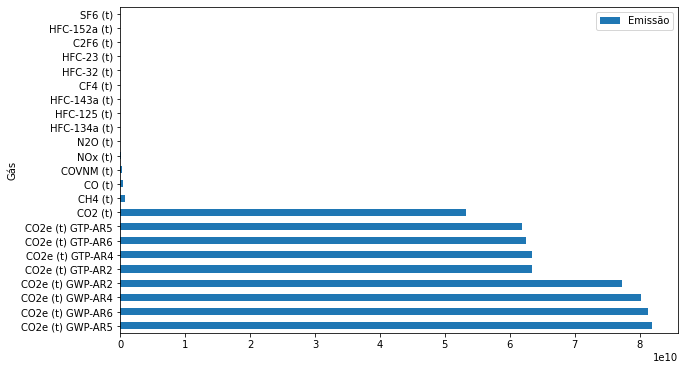

In [ ]:
emissao_por_gas.plot(kind = 'barh', figsize = (10,6));

In [ ]:
emissao_por_gas.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [ ]:
print(f'A emissão de CO2 corresponde a {float(emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum())*100:.2f} % de emissão total de gases estufa no Brasil de 1970 a 2021.')

A emissão de CO2 corresponde a 99.74 % de emissão total de gases estufa no Brasil de 1970 a 2021.


### Emissão de gases por setor

Agora vamos em busca de duas informações:

- Descobrir quais são os setores mais poluentes para cada gás;
- Descobrir quais são os gases mais poluentes para cada setor.

In [ ]:
gas_por_setor = emissoes_por_ano.groupby(['Gás', 'Setor de emissão']).sum()
gas_por_setor

Emissão
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

Para descobrir o setor que emite a maior quantidade de CO2, podemos realizar uma seleção específica do gás CO2 com o uso do método *cross-section* [`xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html), extraindo a partir disso o valor máximo e índice máximo com os métodos [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html) e [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html?highlight=idxmax#pandas.DataFrame.idxmax).

In [ ]:
gas_por_setor.xs('CO2 (t)', level = 0)

,Emissão
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [ ]:
gas_por_setor.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'), level = [0,1])

,,Emissão
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [ ]:
gas_por_setor.xs('CO2 (t)', level = 0).max()

Emissão    3.733930e+10
dtype: float64

In [ ]:
gas_por_setor.xs('CO2 (t)', level = 0).idxmax()

Emissão    Mudança de Uso da Terra e Floresta
dtype: object

Para evitar uma forma manual para cada tipo de gás, podemos explorar ainda mais o método `groupby()` em conjunto com o [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.idxmax.html?highlight=idxmax#pandas.core.groupby.DataFrameGroupBy.idxmax).

In [ ]:
gas_por_setor.groupby(level = 0).idxmax()

,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


Por fim, podemos criar uma tabela sumarizada com as informações dos valores máximos de emissão para cada tipo de gás e com a referência do setor com maior emissão de cada gás.

In [ ]:
gas_por_setor.groupby(level = 0).max()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.959769e+08
CO2 (t),3.733930e+10
CO2e (t) GTP-AR2,3.850044e+10
CO2e (t) GTP-AR4,3.850044e+10
CO2e (t) GTP-AR5,3.831675e+10
CO2e (t) GTP-AR6,3.843359e+10


In [ ]:
valores_max = gas_por_setor.groupby(level = 0).max().values

In [ ]:
tabela_sumarizada = gas_por_setor.groupby(level = 0).idxmax()
tabela_sumarizada.insert(1, 'Quantidade de emissão', valores_max)
tabela_sumarizada

,Emissão,Quantidade de emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


Podemos alterar a ordem dos níveis de índice para encontrar a outra informação, que nos diz qual o gás mais emitido para cada tipo de setor. Para isso, vamos utilizar o método [`swaplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.swaplevel.html).

In [ ]:
gas_por_setor.swaplevel(0, 1)

Emissão
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   9.361215e+07
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [ ]:
gas_por_setor.swaplevel(0, 1).groupby(level = 0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


### Emissão ao longo dos anos

Vamos identificar se as emissões de gases estufas aumentaram ou diminuíram ao longo dos anos e visualizar essa variação para cada tipo de gás emitido separadamente.

In [ ]:
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


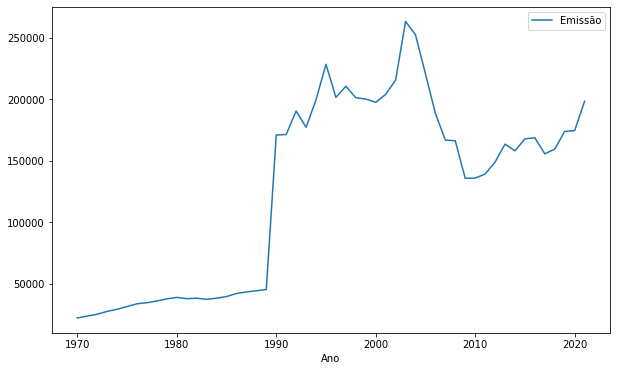

In [ ]:
emissoes_por_ano.groupby('Ano').mean().plot(figsize = (10,6));

In [ ]:
emissoes_por_ano.groupby('Ano').mean().idxmax()

Emissão    2003
dtype: int64

In [ ]:
emissoes_por_ano.groupby(['Ano', 'Gás']).mean()

Emissão
Ano  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

In [ ]:
media_emissao_anual = emissoes_por_ano.groupby(['Ano', 'Gás']).mean().reset_index()
media_emissao_anual

,Ano,Gás,Emissão
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [ ]:
media_emissao_anual = media_emissao_anual.pivot_table(index = 'Ano', columns = 'Gás', values = 'Emissão')
media_emissao_anual

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


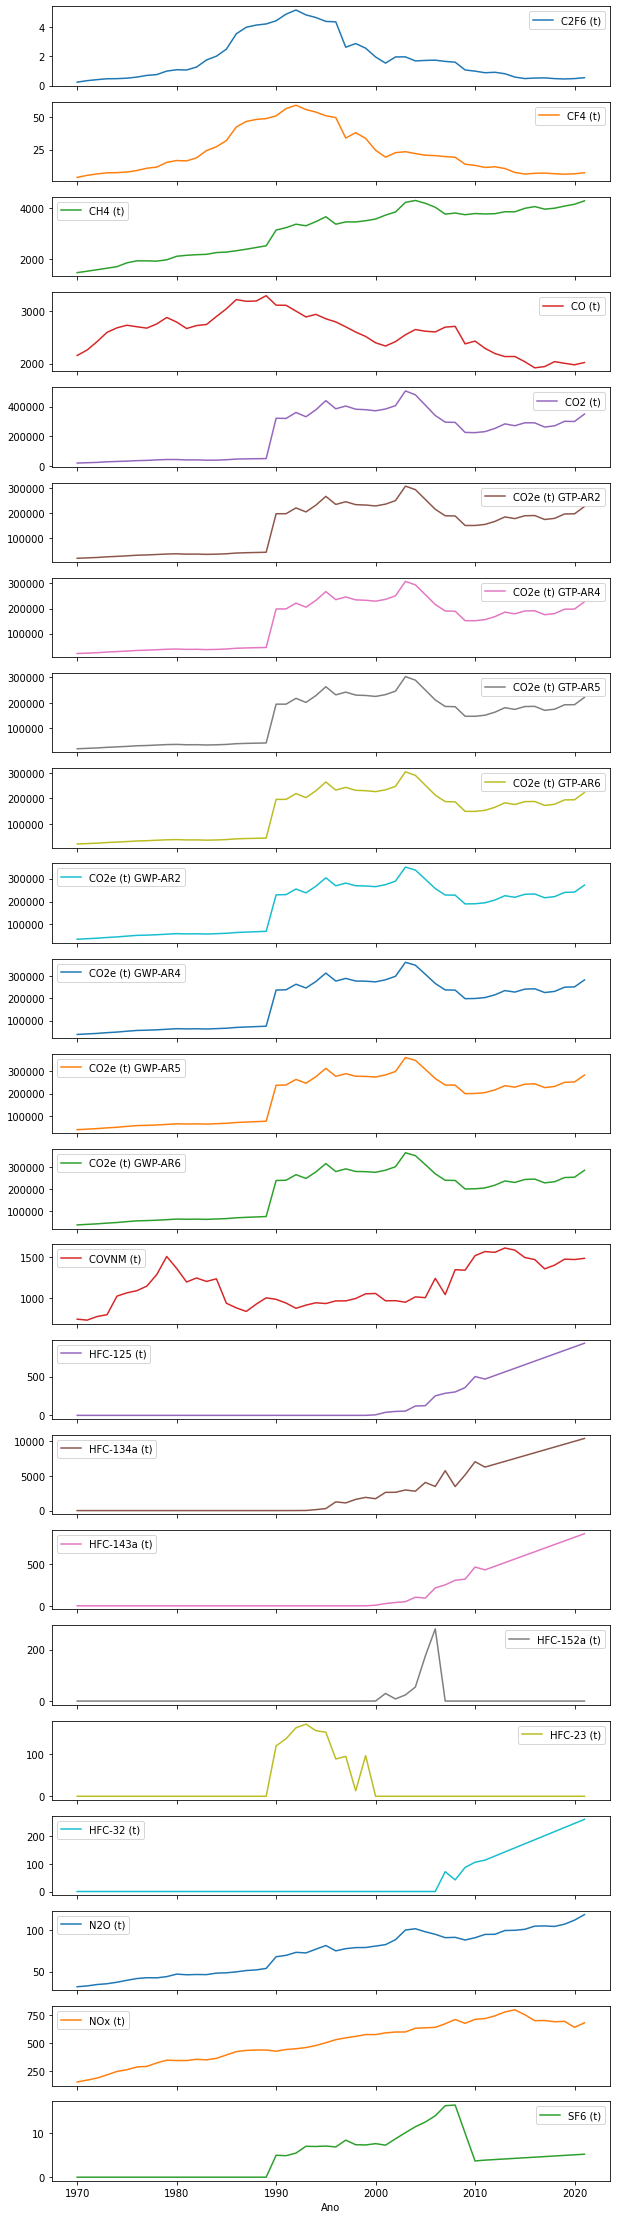

In [ ]:
media_emissao_anual.plot(subplots = True, figsize = (10,40));

### População dos estados

Vamos realizar a importação de uma nova base de dados com a informação da população de cada estado do Brasil, para posteriormente encontrarmos a emissão per capita de cada estado.

ℹ
Os dados foram obtidos através do [censo do IBGE](https://www.ibge.gov.br/estatisticas/sociais/saude/22827-censo-demografico-2022.html?=&t=resultados)

In [ ]:
populacao_estados = pd.read_excel('/content/drive/MyDrive/Alura/dados/POP2022_Municipios.xls', header = 1, skipfooter = 34)
populacao_estados

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237
...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646


Como as informações são referentes aos municípios, vamos realizar uma agregação com base na coluna estado.

In [ ]:
populacao_estados.groupby('UF').sum()

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


Percebemos que a informação da população não foi agregada, portanto será necessário algum tratamento nessa coluna para retornar devidamente os dados.

In [ ]:
# populacao_estados['POPULAÇÃO'].astype(int)

ValueError: ignored

In [ ]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [ ]:
populacao_estados = populacao_estados.assign(populacao_sem_parenteses = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex = True),
                                             populacao = lambda x: x.loc[:,'populacao_sem_parenteses'].replace('\.', '', regex = True))

In [ ]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [ ]:
populacao_estados.loc[:,'populacao'] = populacao_estados['populacao'].astype(int)

In [ ]:
populacao_estados = populacao_estados.groupby('UF').sum()['populacao'].reset_index()
populacao_estados

,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


### Unindo os dados

Com as informações tratadas, podemos realizar a junção dos dados de emissão com a população, com uso do método [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [ ]:
emissao_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado').sum().reset_index()
emissao_estados

,Estado,Emissão
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


In [ ]:
dados_agrupados = pd.merge(emissao_estados, populacao_estados, left_on = 'Estado', right_on = 'UF')
dados_agrupados

,Estado,Emissão,UF,populacao
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023
5,CE,2.034731e+08,CE,8936431
6,DF,5.668738e+07,DF,2923369
7,ES,2.697547e+08,ES,3975100
8,GO,6.008081e+08,GO,6950976
9,MA,9.476324e+08,MA,6800605


Vamos verificar se há algum indício de se a emissão aumenta conforme o tamanho da população.

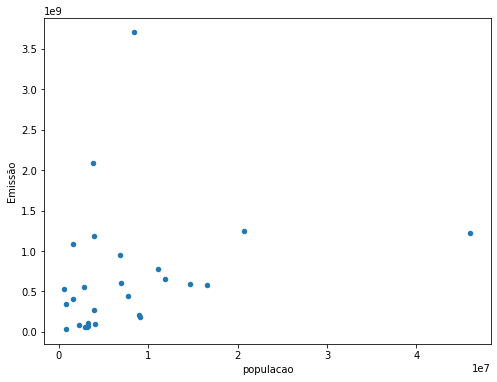

In [ ]:
dados_agrupados.plot(x = 'populacao', y= 'Emissão', kind = 'scatter', figsize=(8,6));

Se quisermos saber a informação de cada estado nos pontos do gráfico, podemos utilizar uma outra biblioteca para obter um gráfico mais elaborado.

In [2]:
#importar
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', text = 'Estado', opacity = 0)

Para obtermos a emissão per capita, criaremos uma nova coluna com a divisão dos valores de emissão pela população de cada estado.

In [ ]:
dados_agrupados = dados_agrupados.assign(emissao_per_capita = dados_agrupados['Emissão']/dados_agrupados['populacao']).sort_values('emissao_per_capita', ascending = False)
dados_agrupados

,Estado,Emissão,UF,populacao,emissao_per_capita
21,RR,5.282071e+08,RR,634805,832.077694
20,RO,1.083515e+09,RO,1616379,670.334662
12,MT,2.081610e+09,MT,3784239,550.073647
13,PA,3.701684e+09,PA,8442962,438.434230
0,AC,3.505471e+08,AC,829780,422.457928
2,AM,1.189649e+09,AM,3952262,301.004463
26,TO,4.082159e+08,TO,1584306,257.662300
11,MS,5.551278e+08,MS,2833742,195.899220
9,MA,9.476324e+08,MA,6800605,139.345312
8,GO,6.008081e+08,GO,6950976,86.435075


In [ ]:
px.bar(data_frame = dados_agrupados, x = 'Estado', y = 'emissao_per_capita')

In [ ]:
px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', text = 'Estado', size = 'emissao_per_capita')